# COGS 108 - Analyzing Predictors of an Anime's Score on MyAnimeList
 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Video: https://www.youtube.com/watch?v=0bhf91dsV7s

For our project, we were interested in determining how different attributes of an anime affects its average score on the website MyAnimeList. Our process involved querying anime data from the MyAnimeList database, cleaning the data to retain only the most relevant information, and performing data analysis on four specific features of anime which we hypothesized might show interesting results. According to our analysis, we found that start season does not have a significant impact on an anime's average score. Furthermore, while genre and source material do have some impacts, the most influential factor in both lowering and raising an anime's score is its producing studio.

# Names

- Kevin Lee
- Alwin Low
- Matthew Peng
- William Sperry
- Michael Sun

<a id='research_question'></a>
# Research Question

Which attributes, such as genre, studio, original source, etc, of an anime affects its MyAnimeList average rating the most?

<a id='background'></a>

## Background & Prior Work

Anime is a popular sub-genre of entertainment which consists of animated media produced in Japan. While "modern" anime first appeared in the 1950s and was targeted mainly towards the Japanese market, the consumer base for anime has expanded steadily over time into a more world-wide phenomenon. For example, consider the significant cultural impact of the Pokemon anime, which first released in the late 1990s. Anime saw a significant boost in consumption during Covid-19 as people looked to expand their media diet due to persistent lockdowns[^1] [^2]. As the prevalence of anime has grown, it has also naturally changed in its character, with some genres growing more popular, and different franchises rising and falling in popularity. 

Anime is a highly monetized medium, with various merchandise and accompanying print media that can be sold, as well as a surprisingly lively DVD market[^3]. As a result, there is already a great deal of existing market research made with the purpose of investment information. These tend to analyze the market size of the medium as well as various monetary statistics like revenue and costs[^4] [^5] [^6]. Perhaps of more interest to our COGS 108 project, anime also has a dedicated fan community which has collected and performed analysis on data collected on its consumption through surveys of AnimeFest attendees and online anime ratings[^7] [^8]. Said fans have also attempted to build predictive models of anime scores before[^9] [^10] . The first one cited reported fairly low predictiveness in their model and concluded there was a lack of sophistication. The second used a more advanced machine learning model that was able to achieve high accuracy, however both of these models found the metrics “favorites” and “members”, which denote the number people who have "favorited" the anime and joined the anime’s community group, were the most predictive variables, which are rather uninteresting results. We believe that we can improve on these prior works by analyzing less obvious relations within data gathered from websites such as MyAnimeList. MyAnimeList is an anime forum and catalog website, which provides users with the ability to organize, score, and review anime.

References:

* \[^1\]: https://www.hollywoodreporter.com/business/business-news/japanese-anime-worlds-most-bankable-genre-1235146810/  
* \[^2\]: https://www.axios.com/2022/01/11/anime-demand-soars-content-straming 
* \[^3\]: https://www.animenewsnetwork.com/feature/2012-03-07 
* \[^4\]: https://www.grandviewresearch.com/industry-analysis/anime-market 
* \[^5\]: https://www.globenewswire.com/news-release/2023/01/20/2592474/0/en/anime-market-is-expected-to-record-growth-at-a-cagr-of-9-5-during-the-forecast-period-2022-2029-business-growth-recent-innovations-technological-advancements-and-market-size.html 
* \[^6\]: https://www.databridgemarketresearch.com/reports/global-anime-market 
* \[^7\]: https://sites.google.com/site/animeresearch/past-results/anime-survey-2022-preliminary-results?authuser=0 
* \[^8\]: https://rstudio-pubs-static.s3.amazonaws.com/556274_05f2e84b5549426ca216030b96b4a42e.html
* \[^9\]: https://towardsdatascience.com/myanimelist-user-scores-fun-with-web-scraping-and-linear-regression-9dd97900a82b
* \[^10\]: https://towardsdatascience.com/building-predictive-models-with-myanimelist-and-sklearn-54edc6c9fff3

[^1]: https://www.hollywoodreporter.com/business/business-news/japanese-anime-worlds-most-bankable-genre-1235146810/  
[^2]: https://www.axios.com/2022/01/11/anime-demand-soars-content-straming 
[^3]: https://www.animenewsnetwork.com/feature/2012-03-07 
[^4]: https://www.grandviewresearch.com/industry-analysis/anime-market 
[^5]: https://www.globenewswire.com/news-release/2023/01/20/2592474/0/en/anime-market-is-expected-to-record-growth-at-a-cagr-of-9-5-during-the-forecast-period-2022-2029-business-growth-recent-innovations-technological-advancements-and-market-size.html 
[^6]: https://www.databridgemarketresearch.com/reports/global-anime-market 
[^7]: https://sites.google.com/site/animeresearch/past-results/anime-survey-2022-preliminary-results?authuser=0 
[^8]: https://rstudio-pubs-static.s3.amazonaws.com/556274_05f2e84b5549426ca216030b96b4a42e.html
[^9]: https://towardsdatascience.com/myanimelist-user-scores-fun-with-web-scraping-and-linear-regression-9dd97900a82b
[^10]: https://towardsdatascience.com/building-predictive-models-with-myanimelist-and-sklearn-54edc6c9fff3

# Hypothesis

We hypothesize that the popularity of an anime is mainly influenced by its genre, which studio produced the anime, and the existence of earlier source material. We specifically predict that genres such as shounen and action which appeal to a wide population of people within the anime community, established studios which have a known track record of high production quality, and source material such as a manga or light novel with large followings, would correlate to a higher popularity on websites such as MyAnimeList. Each of these three factors increases the potential audience for an anime, thus increasing its chances of becoming popular.

# Dataset

- Dataset Name: anime_data.txt
- Link to the dataset: https://github.com/COGS108/Group_Sp23_WeebLosers/blob/master/data/anime_data.txt
- Number of Observations: 24,517

This dataset contains details about anime from the MyAnimeList database that was queried using the MyAnimeList API, and includes various informaion such as genres, airing date, source, etc. The code used to obtain this dataset can be found in [data/data_querying.py](data/data_querying.py).

# Setup

In [95]:
# Data cleaning packages
import pandas as pd
# Data analysis packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import patsy
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import scipy.stats as stats
import scikit_posthocs as sp
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

# Import data into DataFrame
df_full = pd.read_json("data/anime_data.txt", lines=True)

# Data Cleaning

First, let us take a look at the columns the dataframe currently contains.

In [96]:
df_full.columns

Index(['id', 'title', 'main_picture', 'start_date', 'end_date', 'synopsis',
       'mean', 'rank', 'popularity', 'num_list_users', 'num_scoring_users',
       'genres', 'media_type', 'num_episodes', 'start_season', 'broadcast',
       'source', 'average_episode_duration', 'rating', 'studios'],
      dtype='object')

When we were querying for data, we erred on the side of caution by including any data fields that could potentially be interesting to analyze. Upon more careful consideration, we decided to start our analysis process with only a subset of these fields: "title", "start_date", "mean", "num_scoring_users", "genres", "media_type", "start_season", "broadcast", "source", "studios". The first step in our data cleaning process is to drop the extra fields.

In [97]:
df = df_full[["title", "start_date", "mean", "num_scoring_users", "genres", "media_type", "start_season", "broadcast", "source", "studios"]]
df.head()

,title,start_date,mean,num_scoring_users,genres,media_type,start_season,broadcast,source,studios
0,Cowboy Bebop,1998-04-03,8.75,907761,"[{'id': 1, 'name': 'Action'}, {'id': 50, 'name...",tv,"{'year': 1998, 'season': 'spring'}","{'day_of_the_week': 'saturday', 'start_time': ...",original,"[{'id': 14, 'name': 'Sunrise'}]"
1,Cowboy Bebop: Tengoku no Tobira,2001-09-01,8.38,205122,"[{'id': 1, 'name': 'Action'}, {'id': 50, 'name...",movie,"{'year': 2001, 'season': 'summer'}",NaN,original,"[{'id': 4, 'name': 'Bones'}]"
2,Trigun,1998-04-01,8.22,354178,"[{'id': 1, 'name': 'Action'}, {'id': 50, 'name...",tv,"{'year': 1998, 'season': 'spring'}","{'day_of_the_week': 'thursday', 'start_time': ...",manga,"[{'id': 11, 'name': 'Madhouse'}]"
3,Witch Hunter Robin,2002-07-03,7.25,42703,"[{'id': 1, 'name': 'Action'}, {'id': 39, 'name...",tv,"{'year': 2002, 'season': 'summer'}","{'day_of_the_week': 'wednesday', 'start_time':...",original,"[{'id': 14, 'name': 'Sunrise'}]"
4,Bouken Ou Beet,2004-09-30,6.94,6379,"[{'id': 2, 'name': 'Adventure'}, {'id': 10, 'n...",tv,"{'year': 2004, 'season': 'fall'}","{'day_of_the_week': 'thursday', 'start_time': ...",manga,"[{'id': 18, 'name': 'Toei Animation'}]"


Let us take a look at the number of null / missing values in each of these columns.

In [98]:
df.isna().sum()

title                    0
start_date             901
mean                  8959
num_scoring_users        0
genres                 145
media_type               0
start_season          4735
broadcast            21166
source                3759
studios                  0
dtype: int64

It seems suspect that "media_type" and "studios" have no missing values, so we investigate these two columns further.

In [99]:
print(df["media_type"].value_counts())
print("\n")
print(df["studios"].value_counts())

tv         7571
movie      4342
ova        4060
ona        3462
special    2539
music      2487
unknown      56
Name: media_type, dtype: int64


[]                                                                                                              10309
[{'id': 18, 'name': 'Toei Animation'}]                                                                            828
[{'id': 14, 'name': 'Sunrise'}]                                                                                   529
[{'id': 7, 'name': 'J.C.Staff'}]                                                                                  386
[{'id': 11, 'name': 'Madhouse'}]                                                                                  335
                                                                                                                ...  
[{'id': 298, 'name': 'Anima'}, {'id': 1169, 'name': 'ILCA'}, {'id': 1687, 'name': 'Yokohama Animation Lab'}]        1
[{'id': 1505, 'name': 'Studio

We see that there are indeed missing values in these columns that were missed by .value_counts(). 

After seeing these numbers, we decided to drop the "broadcast" column, since the majority of observations is missing this field. Furthermore, since we are investigating the effects of different attributes on an anime's average rating, we cannot use any observations that is missing the "mean" value. We decided not to drop observations with missing data in other fields at this time, since an observation that is missing "studios" but not "source" could still be useful in our analysis. This is just something we will have to keep in mind in future steps. 

In [100]:
df = df.drop(columns=["broadcast"])
df = df.dropna(subset=["mean"])

Furthermore, we want to restrict our data to anime that has been rated by a fairly significant number of people. We choose an arbitrary cutoff for "num_scoring_users" to be greater than 300.

In [101]:
df = df[df["num_scoring_users"] > 300]
df.shape

(12279, 9)

We are left with 12279 observations, which seems like a reasonably large data set. 

Next, we want to apply the following data cleaning steps:
- "start_date" and "start_season" contain overlapping information. To address this, we can convert "start_date" into a "start_year" column and remove year information from "start_season".
- "genres" and "studios" contain dictionaries of id keys and categorical values. To make our data analysis process easier, we want to flatten these dictionaries into lists of categorical values, as we don't really care about the ids. 

In [102]:
# Keep only year value in "start_date"
df["start_date"] = pd.DatetimeIndex(df["start_date"]).year
# Rename "start_date" to "start_year"
df = df.rename(columns={"start_date": "start_year"})

# Keep only season string in "start_season"
df["start_season"] = [list(data.values())[1] if type(data) == dict else None for data in df["start_season"]]

# Keep only genre values in "genres"
df["genres"] = [[list(val.values())[1] for val in data] if type(data) == list else None for data in df["genres"]]

# Keep only studio values in "studios"
df["studios"] = [[list(val.values())[1] for val in data] if type(data) == list else None for data in df["studios"]]

# Take a look at the cleaned data
df.head()

,title,start_year,mean,num_scoring_users,genres,media_type,start_season,source,studios
0,Cowboy Bebop,1998.0,8.75,907761,"[Action, Adult Cast, Award Winning, Sci-Fi, Sp...",tv,spring,original,[Sunrise]
1,Cowboy Bebop: Tengoku no Tobira,2001.0,8.38,205122,"[Action, Adult Cast, Sci-Fi, Space]",movie,summer,original,[Bones]
2,Trigun,1998.0,8.22,354178,"[Action, Adult Cast, Adventure, Sci-Fi, Shounen]",tv,spring,manga,[Madhouse]
3,Witch Hunter Robin,2002.0,7.25,42703,"[Action, Detective, Drama, Mystery, Supernatural]",tv,summer,original,[Sunrise]
4,Bouken Ou Beet,2004.0,6.94,6379,"[Adventure, Fantasy, Shounen, Supernatural]",tv,fall,manga,[Toei Animation]


At this point, we believe that our data has been adequately cleaned and is now ready for EDA. Each of the columns contains data which clearly reflects its respective column name, and columns with multiple data values for each observation now cleanly contain simple lists of values instead of the original list-of-dictionaries format. 

# Data Analysis & Results

In the following sections, we will analyze how different attributes of an anime might affect its average rating. Before we begin, let us first examine the general distribution of the "mean" rating. 

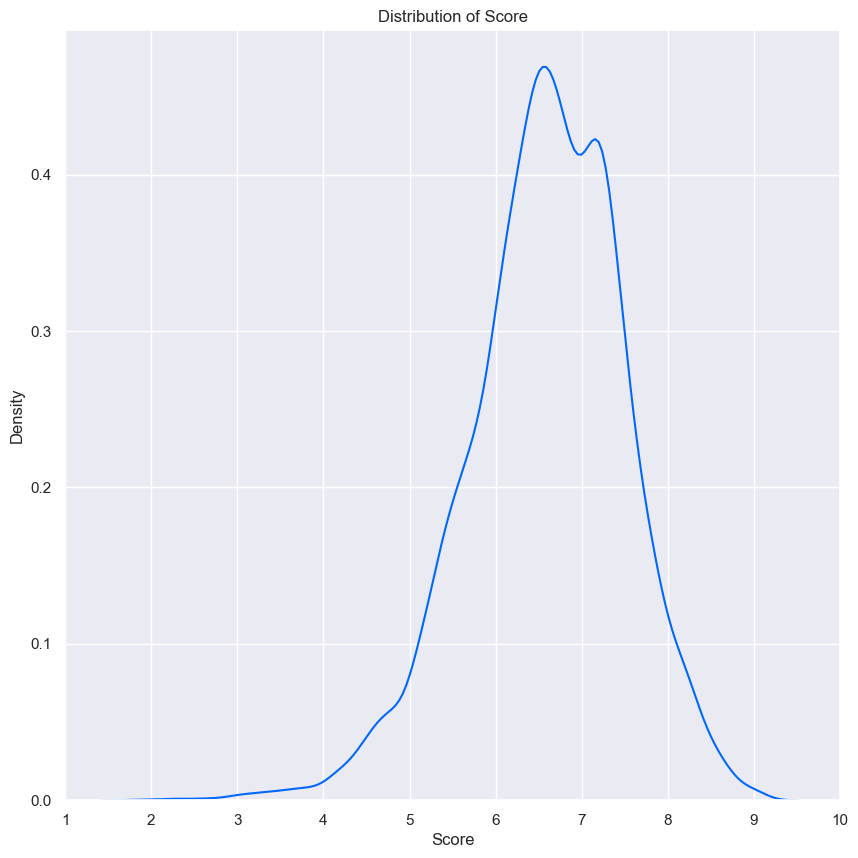

In [103]:
_ = sns.kdeplot(df['mean'],color="#0068ff").set(xlabel='Score',title='Distribution of Score',xlim=(1,10))

We see a left skewed distribution centered around a ~6.5 mean rating. At the very least, this tells us that MyAnimeList ratings are not random.

## Genre Analysis

We will begin our analysis by focusing on the trait of "genre". Lets see what some of the most successful genres are by average rating.

In [104]:
# Make genre specific dataframe to work with
mlb = MultiLabelBinarizer()
genre_df=df.replace(to_replace='None', value=np.nan).dropna()
genre_dummies=pd.DataFrame(mlb.fit_transform(genre_df['genres']), columns=mlb.classes_, index=genre_df.index)
genre_df=pd.concat([genre_df['mean'] , genre_dummies],axis=1)

**Visualzation of Genre Data**

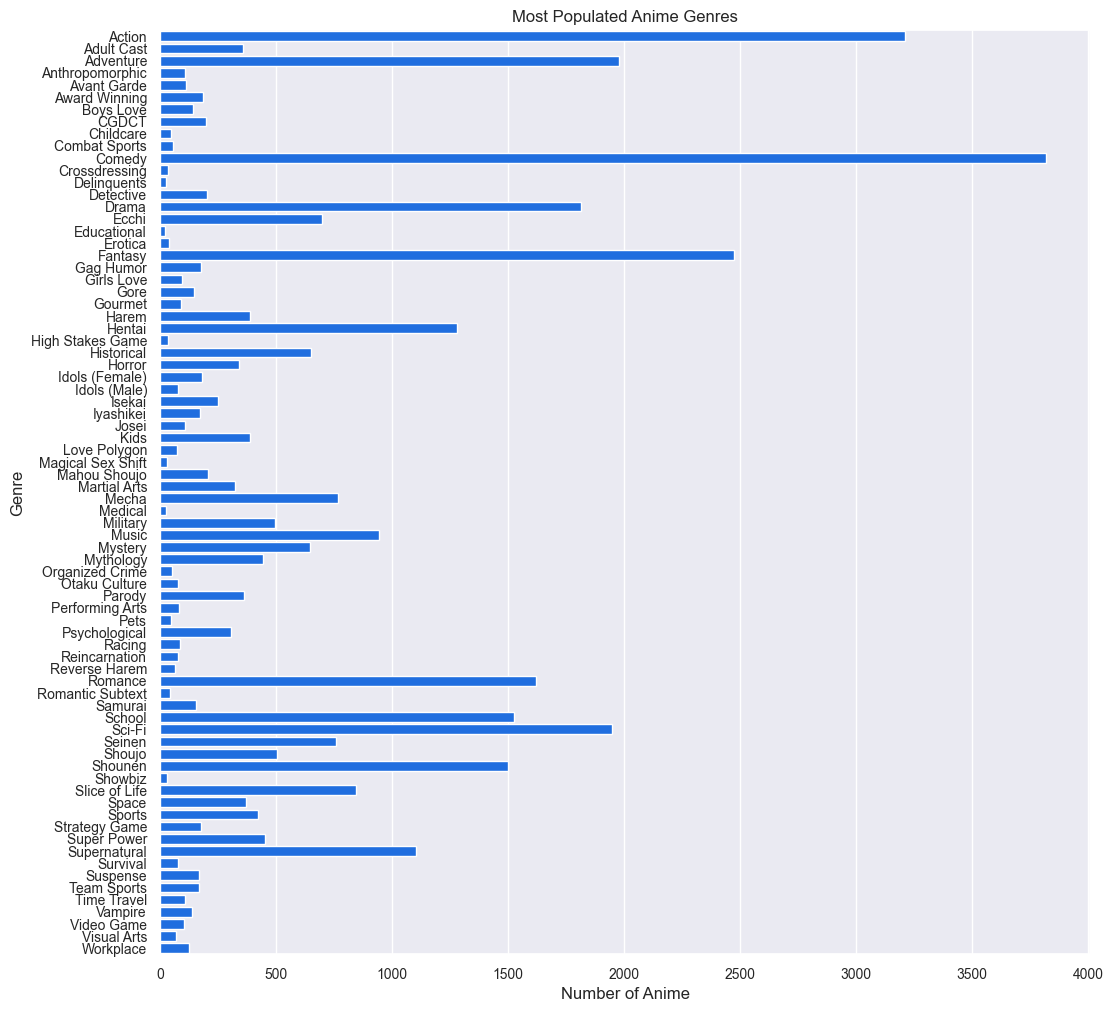

In [105]:
# Plot counts of each genre
gc = pd.melt(genre_dummies)
sns.set(rc={"figure.figsize": (12,12)})
genre_plot = sns.countplot(data=gc.loc[gc['value'] != 0], y='variable', hue='value', palette=['#0068ff'])
genre_plot.tick_params(labelsize=10)
genre_plot.set(xlabel="Number of Anime", ylabel="Genre",title='Most Populated Anime Genres')
plt.legend([],[], frameon=False)

plt.show()

This is a plot of the counts of each genre. As can be seen, the Comedy genre greatly outnumbers all other genres. This can be because a lot of anime are labeled with the Comedy genre if it even has some comedy features in it. The Comedy genre can be mixed with many other genres.

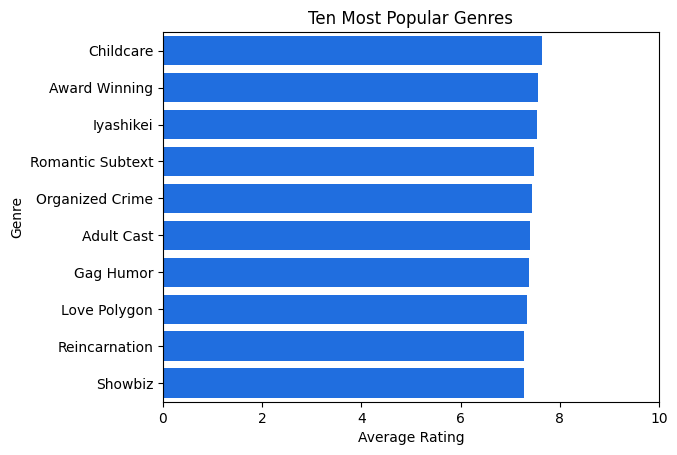

In [106]:
mpl.rc_file_defaults()
genre_means=pd.Series([genre_df.groupby([genre]).mean()['mean'][1] for genre in genre_dummies.columns],
                      index=genre_dummies.columns).sort_values(ascending=False)
_ = sns.barplot(y=genre_means[0:10].index,x=genre_means[0:10],orient='h',
            color="#0068ff").set(title='Ten Most Popular Genres',xlim=(0,10))
_ = plt.ylabel('Genre')
_ = plt.xlabel('Average Score')

Somewhat surprisingly, Award Winning is only ranked as the 2nd most popular genre. Furthermore, despite the fanbase's professed "Isekai" fatigue, Reincarnation remains one of the most highly rated genres.

We may also find it interesting to look at the least popular genres.

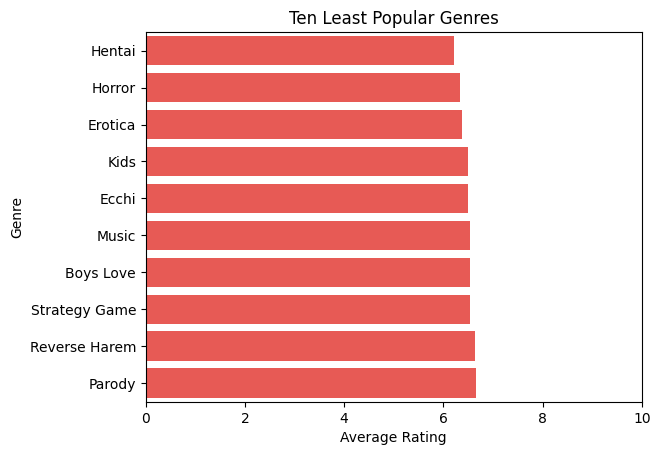

In [107]:
_ = sns.barplot(y=genre_means[-11:-1][::-1].index,x=genre_means[-11:-1][::-1],orient='h',color="#ff433d").set(
    title='Ten Least Popular Genres',xlim=(0,10))
_ = plt.ylabel('Genre')
_ = plt.xlabel('Average Score')

We can compare these values to the overall mean.

In [108]:
genre_df['mean'].mean()

6.669339106654512

**Genre Regression** 

We will now begin our multiple linear regression on the basis of genre.

In [109]:
y = genre_df["mean"]
x = genre_df.loc[:, (genre_df.columns != "mean")]
x = sm.add_constant(x)

mod = sm.OLS(y, x).fit()
result = mod.summary()
result.tables[0]

Dep. Variable:,mean,R-squared:,0.267
Model:,OLS,Adj. R-squared:,0.262
Method:,Least Squares,F-statistic:,52.27
Date:,"Sat, 10 Jun 2023",Prob (F-statistic):,0.00
Time:,17:34:12,Log-Likelihood:,-12336.
No. Observations:,10970,AIC:,2.483e+04
Df Residuals:,10893,BIC:,2.539e+04
Df Model:,76,,
Covariance Type:,nonrobust,,


From this we can postulate that genre can explain about 26% of the variation between ratings, although we cant conclude if this is causal or due to random chance.

In [110]:
mod.params[1::][mod.pvalues[1::] < 0.05].sort_values(ascending=False)[0:10]

Childcare           0.769442
Iyashikei           0.715818
Award Winning       0.696883
Romantic Subtext    0.578827
Gag Humor           0.535607
Shounen             0.492332
Otaku Culture       0.469512
Showbiz             0.448966
Adult Cast          0.440127
Gore                0.430039
dtype: float64

In [111]:
mod.params[1::][mod.pvalues[1::] < 0.05].sort_values()[0:10]

Horror          -0.543344
Avant Garde     -0.492442
Ecchi           -0.271323
Reverse Harem   -0.249190
Comedy           0.073977
Space            0.096150
Music            0.110599
Super Power      0.128050
Harem            0.128579
Action           0.129532
dtype: float64

These two tables show the most positive and least positive/negative estimated effect sizes, which correspond similiarly to the most/least positive anime.

## Studio Analysis 

The studios in the df dataframe are all in a list format, and so we must figure out a way to convert them all to strings to perform data analysis.

In [112]:
# Create a new dataframe solely to perform data analysis on studios and its effects on the score
df_studios = pd.DataFrame()
df_studios['studios'] = df['studios']
df_studios['score'] = df['mean']

# Convert the list values to string. This will also remove all blank entries
df_studios = df_studios.explode('studios')
df_studios.head(5)

,studios,score
0,Sunrise,8.75
1,Bones,8.38
2,Madhouse,8.22
3,Sunrise,7.25
4,Toei Animation,6.94


Here's the distribution in regards to the number of anime produced by each studio.

In [113]:
df_studios['studios'].value_counts()[0:10]

Toei Animation       583
Sunrise              468
J.C.Staff            369
Madhouse             349
Production I.G       306
Studio Deen          273
TMS Entertainment    249
OLM                  229
A-1 Pictures         221
Pierrot              220
Name: studios, dtype: int64

### Visualization of Studios

Now that all studio entries are of type String and all blank studio entries removed, we can now show a visual distribution of the studios in terms of how many animes each has produced. For our interest, we are only taking into account the top 50 studios.

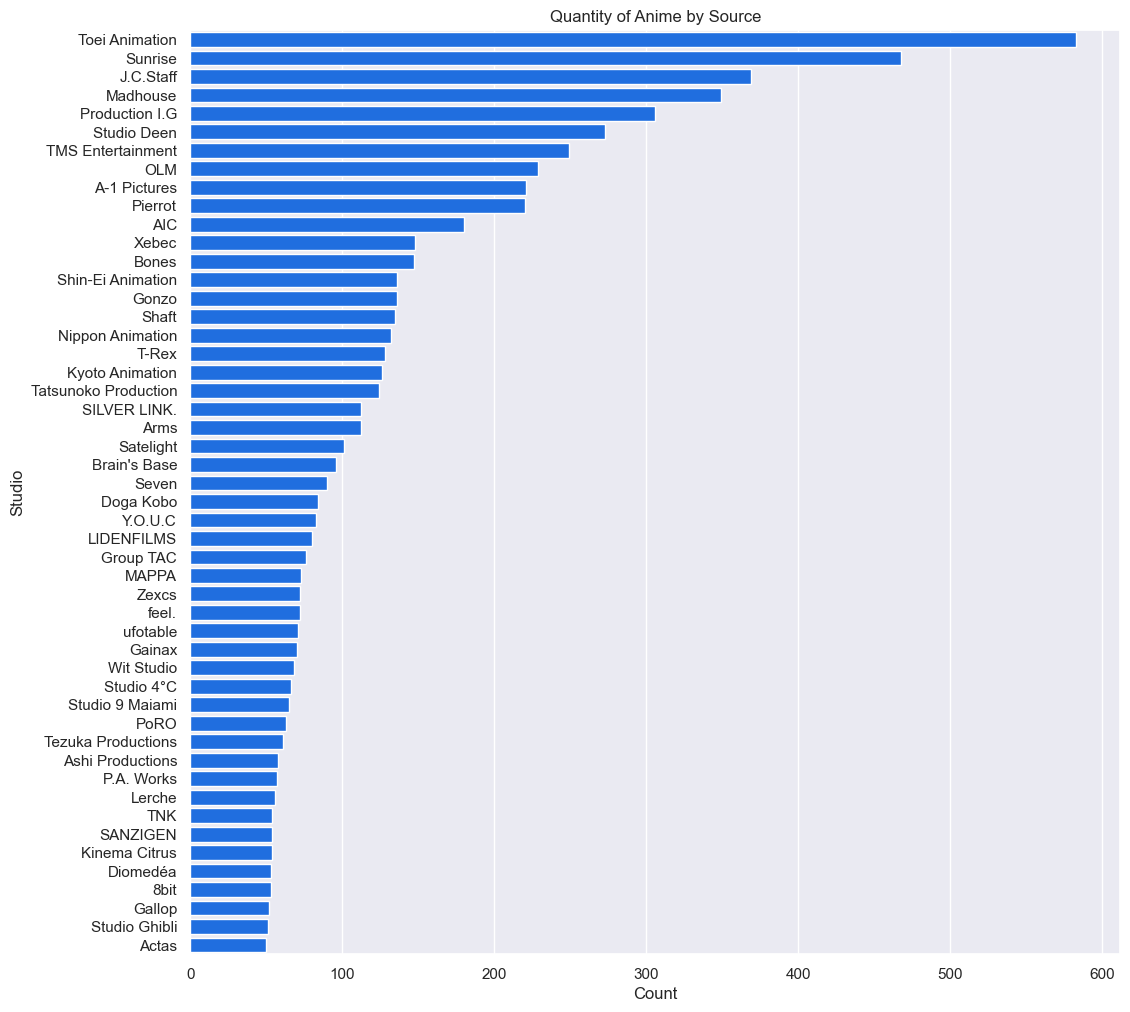

In [114]:
# Plot counts for top 50 studios
s = df_studios['studios'].value_counts()
dummy =  pd.get_dummies(df_studios['studios'])

sc = pd.melt(dummy[s.index[:50]])
sns.set(rc={"figure.figsize": (12,12)})
studio_plot = sns.countplot(data=sc.loc[sc['value'] != 0],
                y='variable', hue='value', palette=['#0068ff']).set(
                    xlabel='Count',ylabel='Studio',title='Quantity of Anime by Source')
plt.legend([],[], frameon=False)

plt.show()

Let's then take a look at the studios with the 10 highest anime score rating on MyAnimeList.

In [115]:
df_studios.nlargest(10, ['score'])

,studios,score
3961,Bones,9.10
5667,White Fox,9.07
9880,Bandai Namco Pictures,9.07
16617,Pierrot,9.07
22348,MAPPA,9.07
14865,Wit Studio,9.06
17572,A-1 Pictures,9.06
15525,Bandai Namco Pictures,9.05
5989,Sunrise,9.04
6456,Madhouse,9.04


We can see that 7 of the top 10 studios based on highest score are in the top 50 studios that has produced the most anime, and all of the them are within the top 60 studios.

### Average Score
We then compare the average score of the top 50 anime studios against the bottom 50 anime studios.

**NOTE:** Since there are a lot of anime studios that has only produced one anime, we are just choosing 50 random studios from that pool.

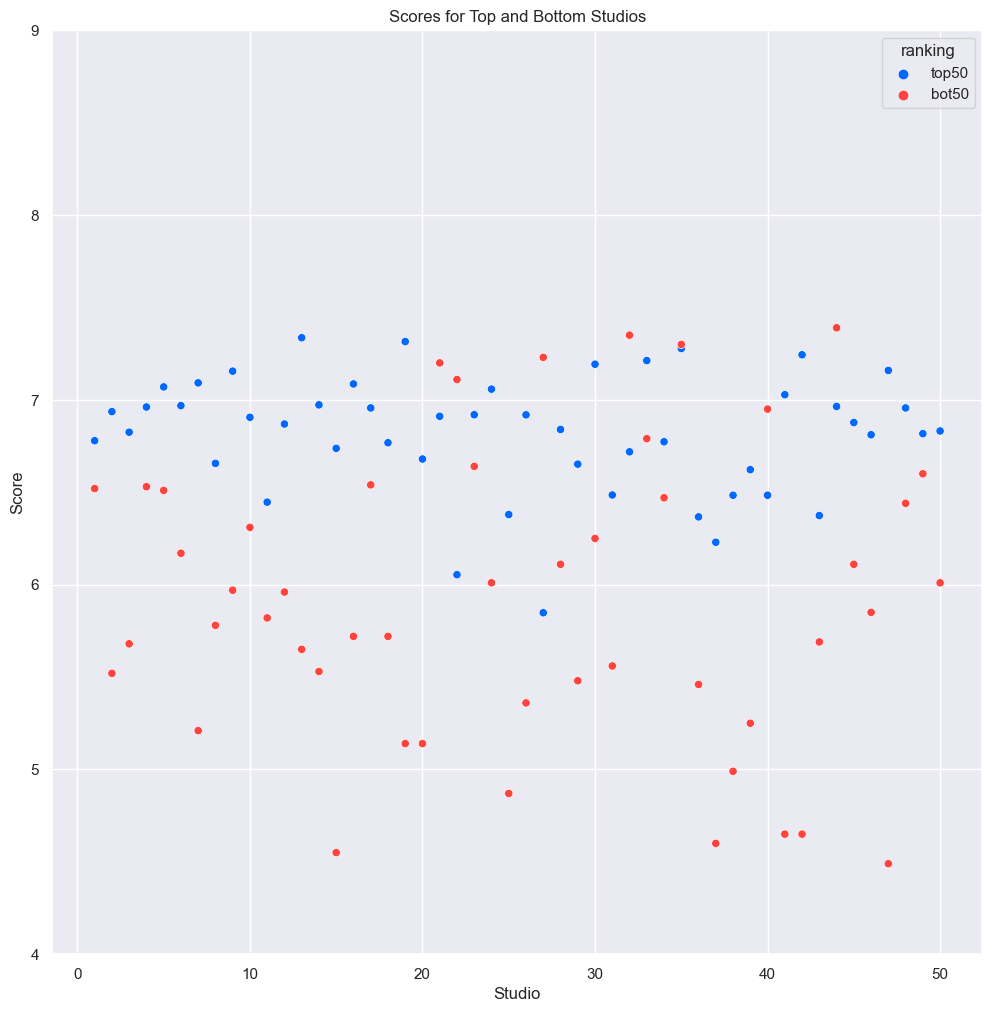

In [116]:
# Create a list of the top 50 anime studios in terms of volume of anime produced
top50 = df_studios['studios'].value_counts().iloc[:50].sort_values(ascending=False).index.tolist()

# Create a list of the bottom 50 anime studios in terms of volume of anime produced
bot50 = df_studios['studios'].value_counts().iloc[-50:].index.tolist()

# Create a dictionary storing the studio number (1 - 50), the average mean score for that studio, 
# and it's ranking (top50 / bot50)
dic = {'studio': [], 'mean': [], 'ranking': []}
i = 0

# for loop to loop through every studio in the top50
for studio in top50:
  slist = [studio]
  ans = df_studios.query('studios == @studio')['score'].mean()
  i += 1

  # append the values into the dictionary
  dic['studio'].append(i)
  dic['mean'].append(ans)
  dic['ranking'].append('top50')

i = 0
# for loop to loop through every studio in the bot50
for studio in bot50:
  slist = [studio]
  ans = df_studios.query('studios == @studio')['score'].mean()
  i += 1

  # append the values into the dictionary
  dic['studio'].append(i)
  dic['mean'].append(ans)
  dic['ranking'].append('bot50')

# create a dataframe based on the dictionary we created earlier
dft = pd.DataFrame(data = dic)
fig, ax = plt.subplots()

# use a scatterplot to compare the average means of the top50 vs bot50 studios
sns.set(rc={"figure.figsize": (10,10)})
sns.scatterplot(x="studio", y="mean", hue = "ranking", data = dft, ax = ax, palette=["#0068ff",'#ff433d']).set(
  title='Scores for Top and Bottom Studios',xlabel='Studio',ylabel='Score')
_ = ax.set_ylim(4, 9)

From the scatterplot above, we can see that the top 50 anime studios, in terms of number of anime produced, generally have a higher average score than those from the bottom 50 anime studios. This despite having produced a large number of anime which would undoubtedly bring the average mean score down since it is hard to maintain the same standard of quality for all of their works.
<br />
<br />

**NOTE:** We must however keep in mind that the 50 random studios we picked for the bottom 50 may not have been the best sample as there were so many anime studios that has only produced one anime.

Just to confirm our suspicion, we created a barplot to show the total average mean for top50 studios against bot50 studios.

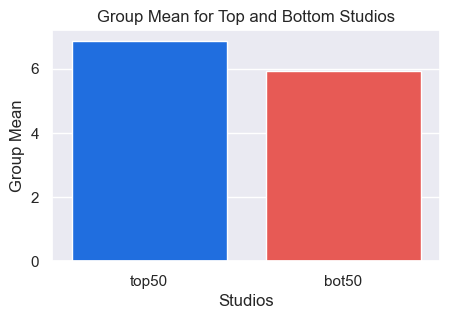

In [117]:
# dictionary sto store total average mean, and studios placement (top50 / bot50)
dic = {'total mean': [], 'studios': []}

total_mean = df_studios.query('studios == @top50')['score'].mean()
dic['total mean'].append(total_mean)
dic['studios'].append('top50')

total_mean = df_studios.query('studios == @bot50')['score'].mean()
dic['total mean'].append(total_mean)
dic['studios'].append('bot50')

# create dataframe based on the dictionary
df_mean = pd.DataFrame(data = dic)
sns.set(rc={"figure.figsize": (5,3)})

# plot a barplot to showcase the difference
_ = sns.barplot(x = 'studios', y = 'total mean', data = df_mean, palette=["#0068ff",'#ff433d']).set(
    title='Group Mean for Top and Bottom Studios',xlabel='Studios',ylabel='Group Mean')

### Regression Over Studios

Let's perform regression on the Studios.

In [118]:
mlb = MultiLabelBinarizer()
studios = df['studios']
scores = df['mean']
dummy = pd.DataFrame(mlb.fit_transform(studios), columns=mlb.classes_, index=studios.index)
df_studioss =pd.concat([scores , dummy],axis=1)

y = df_studioss["mean"]
x = df_studioss.loc[:, (df_studioss.columns != "mean")]
x = sm.add_constant(x)

mod = sm.OLS(y, x).fit()
result = mod.summary()
result.tables[0]


Dep. Variable:,mean,R-squared:,0.322
Model:,OLS,Adj. R-squared:,0.275
Method:,Least Squares,F-statistic:,6.873
Date:,"Sat, 10 Jun 2023",Prob (F-statistic):,0.00
Time:,17:34:16,Log-Likelihood:,-13824.
No. Observations:,12279,AIC:,2.923e+04
Df Residuals:,11486,BIC:,3.511e+04
Df Model:,792,,
Covariance Type:,nonrobust,,


Let's then check how many studios are significant enough to the point where they affect the anime score.

In [119]:
sig_studios_len = len(mod.params[1::][mod.pvalues[1::] < 0.05].sort_values(ascending=False))
total_studios_len = len(df_studios['studios'].value_counts())
ratio = sig_studios_len / total_studios_len
print("Number of significant studios: ", sig_studios_len, "\nNumber of studios: ", total_studios_len, "\nRatio: ", ratio)

Number of significant studios:  251 
Number of studios:  800 
Ratio:  0.31375


This means that there are 251 studios that are significant enough where they would either positively or negatively impact the mean score as more animes are produced by them. This is out of a total of 800 studios, which tells us that many studios play a significant part in the score of an anime being what it is.
<br>
<br>

Let's then check how many of those 251 studios have a positive influence and which of those have a negative influence on the score.

In [120]:
sig_studios = mod.params[1::][mod.pvalues[1::] < 0.05].sort_values(ascending=False)
pos_influence = []
neg_influence = []

for i in range(sig_studios_len):
  if sig_studios[i] > 0:
    pos_influence.append(sig_studios[i])
  else:
    neg_influence.append(sig_studios[i])

print("Number of studios with positive influence on score: ", len(pos_influence), "\nNumber of studios with negative influence on score: ", len(neg_influence))

Number of studios with positive influence on score:  217 
Number of studios with negative influence on score:  34


As we can see above, there are many more studios that have positive influence rather than negative influence on the mean anime score.


All in all, it seems like studios are much more inclined to have a postive impact on the score of an anime rather than a negative one. Common sense seems to dictate that this is natural as people are more likely to keep their eyes open for a good studio rather than a bad studio. Good studios have a kind of fan-following where fans of their works would blindly rate an anime highly even prior to watching it, whereas in the case of bad studios, nobody would make an effort to do so.

## Source Analysis

We begin by creating a dataframe where source for each entry is transformed into a numeric label that can be used for regression later. MyAnimeList treats entries for which the source attribute is null as having an unknown source, so we will do the same.

In [121]:
df_source = df[['mean','source']]
df_source['source'] = df_source['source'].fillna('unknown')
lb = LabelBinarizer()
df_source_transform = pd.DataFrame(lb.fit_transform(df_source['source']), columns=lb.classes_, index=df_source.index)
df_source = pd.concat([df_source['mean'], df_source_transform], axis=1)
df_source

,mean,4_koma_manga,book,card_game,game,light_novel,manga,mixed_media,music,novel,original,other,picture_book,radio,unknown,visual_novel,web_manga,web_novel
0,8.75,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,8.38,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8.22,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,7.25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,6.94,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24260,7.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
24311,6.47,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24353,8.83,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
24361,5.18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Knowing the number of anime that originate from each source can be useful when interpreting the regression coefficients as well as the mean score for each source, so we start by looking at this.

In [122]:
df_noscore = df_source.loc[:, df_source.columns != 'mean']
df_source_labels = df[['mean','source']]
df_source_labels['source'] = df_source_labels['source'].fillna('unknown')

### Visualization of Source Data

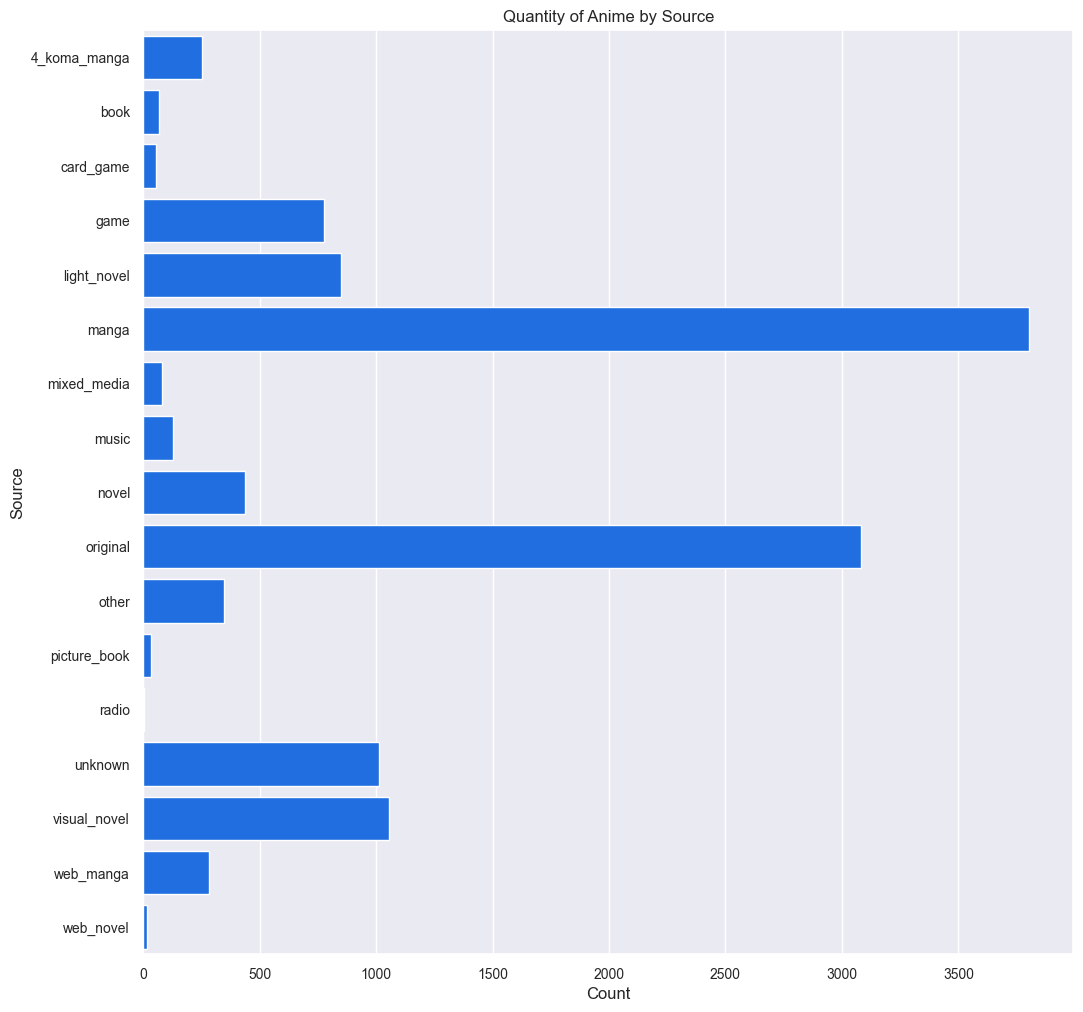

In [123]:
# Plot counts of each source
mpl.rc_file_defaults()
sce = pd.melt(df_source_transform)
sns.set(rc={"figure.figsize": (12,12)})
source_plot = sns.countplot(data=sce.loc[sce['value'] != False], y='variable', hue='value',palette=["#0068ff"])
source_plot.tick_params(labelsize=10)
source_plot.set(xlabel="Count", ylabel="Source",title='Quantity of Anime by Source')
plt.legend([],[], frameon=False)

plt.show()

As can be seen in this count plot, the most popular source of anime in this dataset is Manga. Manga are another popular piece of media that people like to read. It is expected to see that most anime have adapated manga. The second most popular source is Original, meaning that the anime was not derived from any other source and is an original story. As can be seen, Manga and Original sources have a greater count while other sources are relatively similar in count. The one surprising piece of data is the Radio source as we never expected an anime to have a source from a radio program.

As can be seen from the histogram, the vast majority of anime tend to be either manga adaptations or original works. Interestingly, a large number of entries have an unknown source, most likely due to incomplete information on MyAnimeLists's part. Because the other sources have relatively low counts, the score distributions for them may be strongly skewed and should be noted when doing regression.

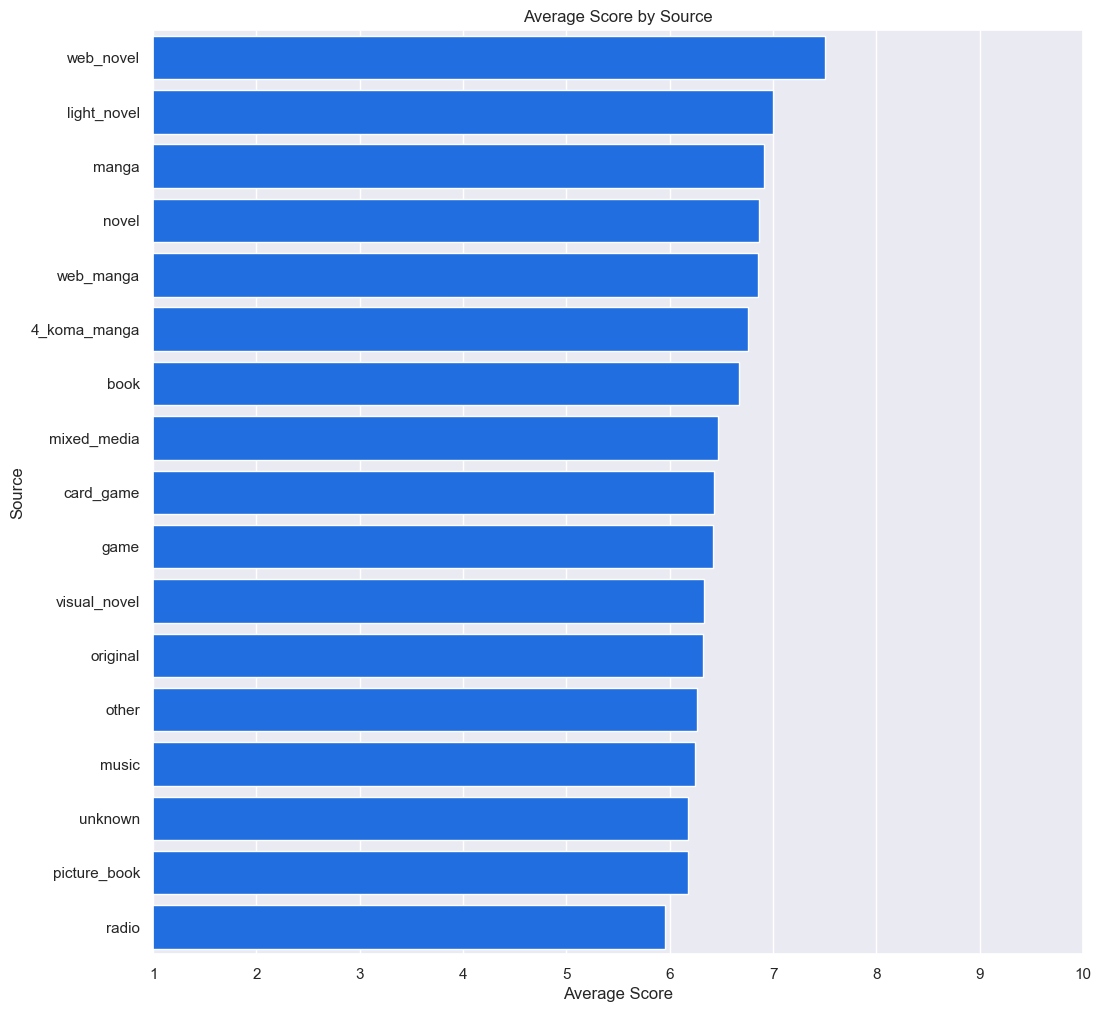

In [124]:
df_source_label_avgs = df_source_labels.groupby(['source']).mean().sort_values(by=['mean'], ascending=False)
_ = sns.barplot(data=df_source_label_avgs, x='mean', y=df_source_label_avgs.index,color="#0068ff").set(xlim=(1,10),title='Average Score by Source',xlabel='Average Score',ylabel='Source')

As expected from the highly uneven distribution in the previous histogram, sources that are much rarer (i.e. picture book, radio, web novel) tend to have more extreme mean scores with higher variance. Most of the top scoring sources are essentially long-form books, presumably targeted toward teens and adults, while sources that have lower mean scores tend to be adaptation of other forms of audiovisual media (i.e. radio, music, games).

We then proceed by using the OLS linear regression function to create a linear model connecting score and source and evaluating its usefulness and accuracy.

In [125]:
tempy = df_source['mean']
tempx = df_source.loc[:, df_source.columns != 'mean']
tempx = sm.add_constant(tempx)
mod = sm.OLS(tempy, tempx).fit()
result = mod.summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     99.76
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          2.61e-310
Time:                        17:34:18   Log-Likelihood:                -15454.
No. Observations:               12279   AIC:                         3.094e+04
Df Residuals:                   12262   BIC:                         3.107e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.1860      0.028    218.654      0.000       6.131       6.241
4_koma_manga     0.5712      0.058      9.835      0.000       0.457       0.685
book             0.4857      0.101      4.818      0.000       0.288       0.683
card_game        0.2395      0.113      2.120      0.034       0.018       0.461
game             0.2368      0.040      5.861      0.000       0.158       0.316
light_novel      0.8132      0.040     20.569      0.000       0.736       0.891
manga            0.7272      0.031     23.345      0.000       0.666       0.788
mixed_media      0.2832      0.094      3.007      0.003       0.099       0.468
music            0.0581      0.076      0.760      0.447      -0.092       0.208
novel            0.6821      0.048     14.311      0.000       0.589       0.776
original         0.1392      0.032      4.380      0.000       0.077       0.202
other            0.0727      0.052      1.411      0.158      -0.028       0.174
picture_book    -0.0112      0.143     -0.078      0.938      -0.291       0.269
radio           -0.2280      0.361     -0.632      0.527      -0.935       0.479
unknown         -0.0111      0.038     -0.293      0.769      -0.085       0.063
visual_novel     0.1471      0.038      3.915      0.000       0.073       0.221
web_manga        0.6649      0.056     11.944      0.000       0.556       0.774
web_novel        1.3151      0.192      6.866      0.000       0.940       1.691
==============================================================================
Omnibus:                      609.476   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.955
Skew:                          -0.474   Prob(JB):                    1.10e-182
Kurtosis:                       3.859   Cond. No.                     5.11e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.63e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The extremely low R-squared value of 0.115 indicates that there is little direct correlation, if any, between an anime's source and its mean score. However, this information may still be useful in combination with other variables; we can therefore examine which labels specifically have the greatest impact in the regression model.

In [126]:
mod.params[1::][mod.pvalues[1::] < 0.05].sort_values(ascending=False)

web_novel       1.315102
light_novel     0.813188
manga           0.727181
novel           0.682123
web_manga       0.664917
4_koma_manga    0.571242
book            0.485730
mixed_media     0.283241
card_game       0.239547
game            0.236826
visual_novel    0.147148
original        0.139204
dtype: float64

These results reflect the score distributions in the histograms previously, with print sources such as web novels and light novels having the strongest positive impact while other sources such as games and mixed media have a smaller impact.

## Start Season Analysis 

In this section, we analyze the "start_season" variable and its effects on an anime's "mean" rating. First, let us drop all rows that is missing the "start_season" column.

In [127]:
season_df = df.dropna(subset=["start_season"])

We can take a look at the distribution of the "start_season" data.

In [128]:
season_df.groupby(by="start_season")["mean"].describe()

,count,mean,std,min,25%,50%,75%,max
start_season,,,,,,,,
fall,3302.0,6.646790,0.867665,1.84,6.1225,6.68,7.24,9.07
spring,3003.0,6.672804,0.863369,3.07,6.1400,6.70,7.26,9.10
summer,2820.0,6.596809,0.865824,2.22,6.0700,6.62,7.19,8.94
winter,2802.0,6.609993,0.874143,2.53,6.0800,6.64,7.22,9.07


Our dataset seems to be relatively balanced between the four seasons. The mean ratings of each category are all around ~6.6, with similar standard deviation values.

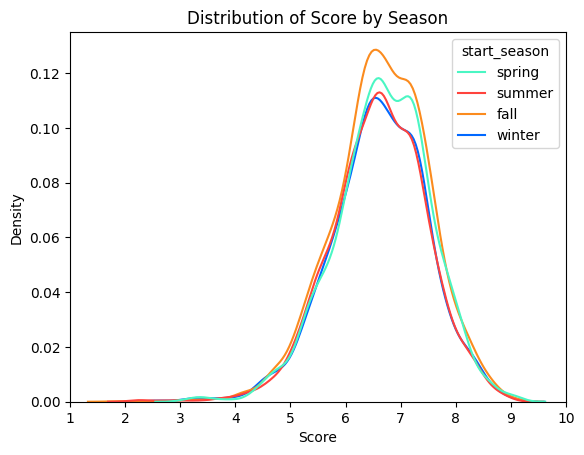

In [129]:
mpl.rc_file_defaults()
spring = season_df.loc[season_df['start_season'] == "spring"]
summer = season_df.loc[season_df['start_season'] == "summer"]
fall = season_df.loc[season_df['start_season'] == "fall"]
winter = season_df.loc[season_df['start_season'] == "winter"]
_ = sns.kdeplot(data=season_df,x="mean",hue='start_season',palette=['#4af6c3','#ff433d','#fb8b1e','#0068ff']).set(xlim=(1,10),xlabel='Score',title='Distribution of Score by Season')

The scores seem to be similarly distributed as well. At first glance, it appears that the start season of an anime does not significantly impact its mean score. However, we should perform some statistical tests to test this hypothesis. We can perform a linear regression model using patsy to determine any correlations between "mean" and "start_season".

In [130]:
outcome, predictor = patsy.dmatrices("mean ~ C(start_season)", data = season_df)
res_1 = sm.OLS(outcome, predictor).fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.677
Date:                Sat, 10 Jun 2023   Prob (F-statistic):            0.00288
Time:                        17:34:19   Log-Likelihood:                -15229.
No. Observations:               11927   AIC:                         3.047e+04
Df Residuals:                   11923   BIC:                         3.050e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The low R-squared value suggests that "start_season" does not explain the variations in "mean". That being said, we can still run an ANOVA test to analyze the significance of the differences in means between anime from different "start_season". Before doing so, we must satsify the 4 assumptions of t-tests:
1. Data are continuous
2. Normally distributed
3. Equal variance between groups
4. Not paired

Unfortunately, from the histplots, it appears that the data is heavily left skewed. Therefore, we elect to use a Kruskal-Wallis test, which tests the null hypothesis that means of some groups are equal. Kruskal-Wallis is a nonparametric test, so we do not need to worry about our data being non-normally distributed.

In [131]:
fvalue, pvalue = stats.kruskal(winter["mean"], spring["mean"], summer["mean"], fall["mean"])
fvalue, pvalue

(14.93516187358159, 0.0018729043149153428)

Since the resulting p-value is less than 0.05, we reject the null hypothesis, meaning that there is a difference in means between the "start_season" groups. We can use Dunn's test to determine which groups' means are different from each other. 

In [132]:
dunn_results = sp.posthoc_dunn([winter["mean"], spring["mean"], summer["mean"], fall["mean"]], p_adjust = 'bonferroni')
print(dunn_results)
print(dunn_results > 0.05)

          1         2         3         4
1  1.000000  0.034192  1.000000  0.656295
2  0.034192  1.000000  0.002764  1.000000
3  1.000000  0.002764  1.000000  0.111485
4  0.656295  1.000000  0.111485  1.000000
       1      2      3     4
1   True  False   True  True
2  False   True  False  True
3   True  False   True  True
4   True   True   True  True


From these results, it appears that the means of anime from Spring differ from the means of anime from Winter and Summer. Looking back at our descriptive analysis, it seems that Spring anime, on average, is rated higher.

## Putting It All Together

Since Start-Season was a relatively weak predictor of rating, we will disclude it from our final analysis. 

In [133]:
# Remove null rows from dataset and store columns into variables

df_total = df.dropna()

genres = df_total['genres']
studios = df_total['studios']
sources = df_total['source']
scores = df_total['mean']

## Make sure all lengths are same
assert(len(genres) == len(studios) and len(studios) == len(sources) and len(sources) == len(scores))

In [134]:
# Create dummmy tables

mlb = MultiLabelBinarizer()
df_genres = pd.DataFrame(mlb.fit_transform(genres), columns=mlb.classes_, index=genres.index)
df_studios = pd.DataFrame(mlb.fit_transform(studios), columns=mlb.classes_, index=studios.index)
df_sources = pd.get_dummies(sources)
df_total = pd.concat([scores, df_genres, df_studios, df_sources], axis=1)

In [135]:
# Drop null rows to double check

df_total = df_total.dropna()

In [136]:
# Find columns with a bool type and convert to int
for c in df_total.columns:
    if type(df_total[c][0]) == bool or type(df_total[c][0]) == np.bool_:
        df_total[c] = df_total[c].astype(int)

In [137]:
df_total.head(10)

,mean,Action,Adult Cast,Adventure,Anthropomorphic,Avant Garde,Award Winning,Boys Love,CGDCT,Childcare,...,mixed_media,music,novel,original,other,picture_book,radio,visual_novel,web_manga,web_novel
0,8.75,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,8.38,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,8.22,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.25,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,6.94,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7.92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7.55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8.16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8.87,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Multiple Regression over Genre, Studio, and Source**

Here, we create a multiple linear regression model over all genres, studios, and sources.

In [138]:
import statsmodels.api as sm

y = df_total["mean"]
X = df_total.loc[:, (df_total.columns != "mean")]
X = sm.add_constant(X)

mod = sm.OLS(y, X).fit()

In [139]:
result = mod.summary()
result.tables[0]

Dep. Variable:,mean,R-squared:,0.472
Model:,OLS,Adj. R-squared:,0.427
Method:,Least Squares,F-statistic:,10.53
Date:,"Sat, 10 Jun 2023",Prob (F-statistic):,0.00
Time:,17:34:22,Log-Likelihood:,-10540.
No. Observations:,10970,AIC:,2.280e+04
Df Residuals:,10111,BIC:,2.907e+04
Df Model:,858,,
Covariance Type:,nonrobust,,


Now we will loop through each category's coefficients, the categories being genre, studio, and source, and find the mean of the coefficients in each category. We will pick the coefficients that are statistically sigificant, p-value is less than 0.05, because there may be coefficients of genres, studios, and sources that are not significant. We take the absolute value of coefficients here to see how much impact each category has on the mean score, rather than what direction the coefficient takes.

In [140]:
# Loop through genre coefficients and get mean coefficient

genre_coef = 0
all_genre_coefs = []
sig_genre_coefs = []
pos_genre_coefs = []
for c in df_genres.columns:
     # Get coefficients that are signifcant
        if mod.pvalues.loc[c] < 0.05:
                genre_coef += abs(mod.params[c])
                sig_genre_coefs.append(mod.params[c])
                if(mod.params[c] > 0):
                        pos_genre_coefs.append(1)
                else:
                        pos_genre_coefs.append(0)
        all_genre_coefs.append(mod.params[c])

genre_coef = genre_coef / len(df_genres.columns)
genre_coef

0.16880276668834404

In [141]:
# Loop through studio coefficients and get mean coefficient

studio_coef = 0
all_studio_coefs = []
sig_studio_coefs = []
pos_studio_coefs = []
for c in df_studios.columns:
    # Get coefficients that are signifcant
    if mod.pvalues.loc[c] < 0.05:
        studio_coef += abs(mod.params[c])
        sig_studio_coefs.append(mod.params[c])
        if(mod.params[c] > 0):
            pos_studio_coefs.append(1)
        else:
            pos_studio_coefs.append(0)
    all_studio_coefs.append(mod.params[c])
studio_coef = studio_coef / len(df_studios.columns)
studio_coef

0.2442077206688204

In [142]:
# Loop through each source coefficients and get mean coefficient

source_coef = 0
all_source_coefs = []
sig_source_coefs = []
pos_source_coefs = []
for c in df_sources.columns:
    # Get coefficients that are signifcant
    if mod.pvalues.loc[c] < 0.05:
        source_coef += abs(mod.params[c])
        sig_source_coefs.append(mod.params[c])
        if(mod.params[c] > 0):
            pos_source_coefs.append(1)
        else:
            pos_source_coefs.append(0)
    all_source_coefs.append(mod.params[c])
source_coef = source_coef / len(df_sources.columns)
source_coef

0.3625594430339755

By looking at the coefficients that have been calculated, the greatest coefficient is from source and with the studio coming in a close second behind. The lowest coefficient would be the genre. This can be reasoned that the source of an anime can influence the rating of an anime greatly because if an anime is based off an external source, then fans of the original story will most likely watch the anime. Because many fans will be watching the show, the ratings may be skewed highly positively or even highly negatively. This brings us to the second coefficient, the studio coefficient.

The studio coefficient would also have a relatively significant effect on the rating because the studio directs the entire production of the anime. If a fan of a series watches an anime adaptation that was poorly directed by a studio, those fans will most likely rate the anime very poorly. If the same studio does the same thing for multiple anime adaptations, we can see how a studio effects the rating of anime.

In [143]:
# See the amount of positive coefficients for each category
print("Percentage of Positive Genre Coefficients: " + str(sum(pos_genre_coefs) / len(pos_genre_coefs)))
print("Percentage of Positive Studio Coefficients: " + str(sum(pos_studio_coefs) / len(pos_studio_coefs)))
print("Percentage of Positive Source Coefficients: " + str(sum(pos_source_coefs) / len(pos_source_coefs)))

Percentage of Positive Genre Coefficients: 0.9166666666666666
Percentage of Positive Studio Coefficients: 0.7813953488372093
Percentage of Positive Source Coefficients: 1.0


By looking at the percentage of positive coefficients in each category, we can see that the source of an anime does not affect the mean score of anime negatively at all. Similarly, the genre of an anime hardly negatively affects the mean score of an anime as 91.67% of coefficients have a positive value. However, the studio of an anime has a relatively lower percentage of positive coefficients at 78.14%. This would make sense because as stated previously, when a studio poorly produces an anime, it can really negatively impact a mean score of an anime compared to the average anime.

Additionally, as we have seen before, the genre coefficients have a higher average, meaning that although an anime's genre has the biggest impact on the mean score, it is more likely to positively impact the mean score than a studio would.

### **Scatterplots of All Significant Genre, Studio, and Source Coefficients**

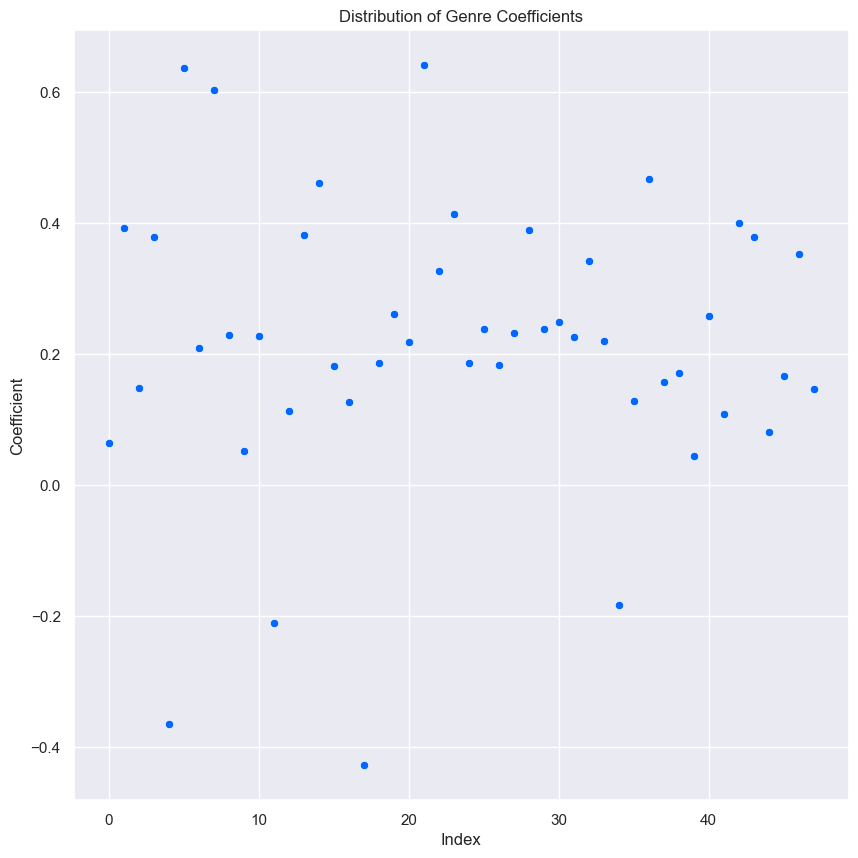

In [144]:
# Create scatterplot of all genre coefficients
sns.set(rc={"figure.figsize": (10,10)})
sp_sig_genre_coefs = sns.scatterplot(data=sig_genre_coefs,color="#0068ff")
_ = sp_sig_genre_coefs.set(ylabel = "Coefficient", xlabel="Index",title='Distribution of Genre Coefficients')

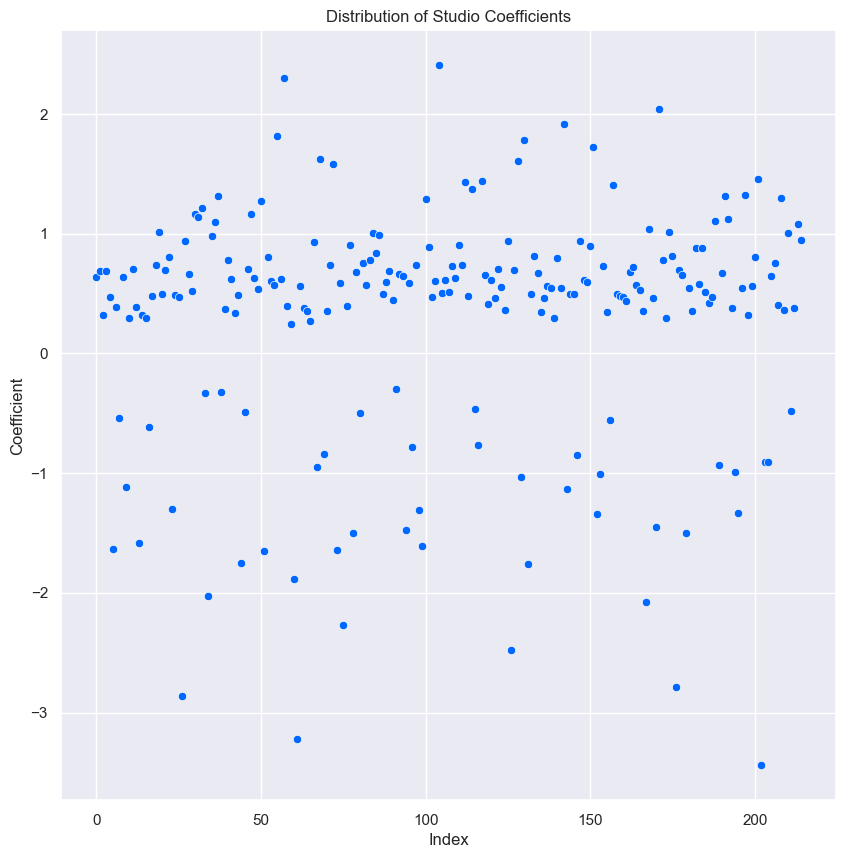

In [145]:
# Create scatterplot plot of all studio coefficients
sns.set(rc={"figure.figsize": (10,10)})
sp_sig_studio_coefs = sns.scatterplot(data=sig_studio_coefs,color="#0068ff")
_ = sp_sig_studio_coefs.set(ylabel = "Coefficient", xlabel="Index",title='Distribution of Studio Coefficients')

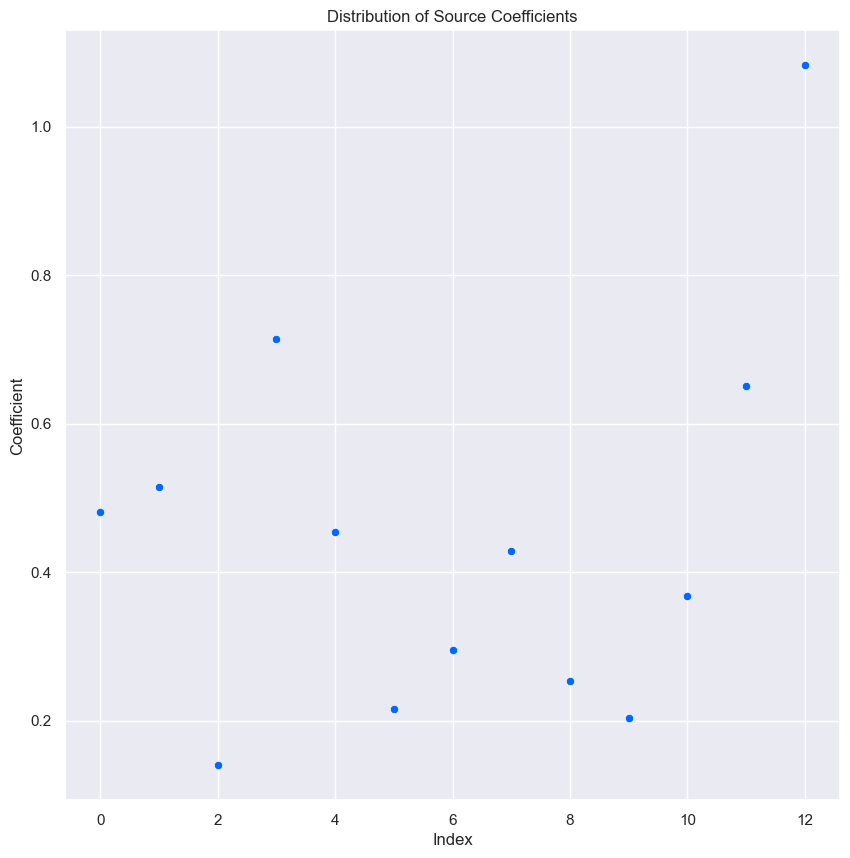

In [146]:
# Create scatterplot of all source coefficients
sns.set(rc={"figure.figsize": (10,10)})
sp_sig_source_coefs = sns.scatterplot(data=sig_source_coefs,color="#0068ff")
_ = sp_sig_source_coefs.set(ylabel = "Coefficient", xlabel="Index",title='Distribution of Source Coefficients')

These separate coefficient scatterplots show the percentages of positive coefficients calculated before in a more visual manner. The source category only has positive coefficients, the genre coefficients are mostly positive, and the studio categories have more negative values than the rest.

### **Scatterplots of all Coefficients**

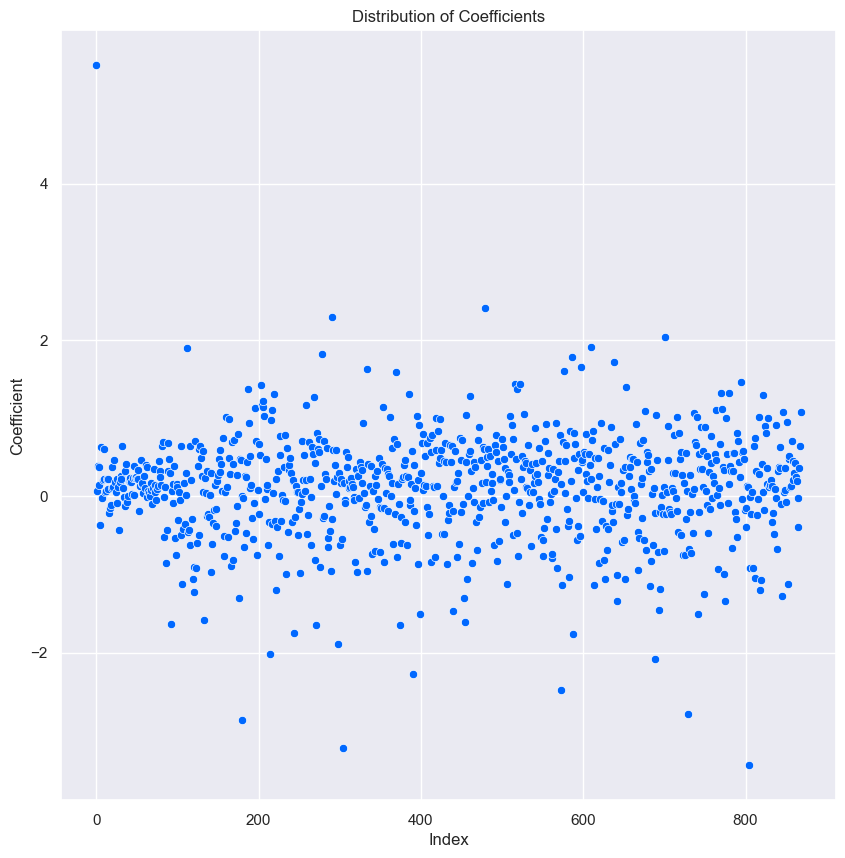

In [147]:
# Create a scatterplot of every single coefficient
sns.set(rc={"figure.figsize": (10,10)})
sp_all_coefs = sns.scatterplot(data=mod.params.values,color="#0068ff")
_ = sp_all_coefs.set(ylabel = "Coefficient", xlabel="Index",title='Distribution of Coefficients')

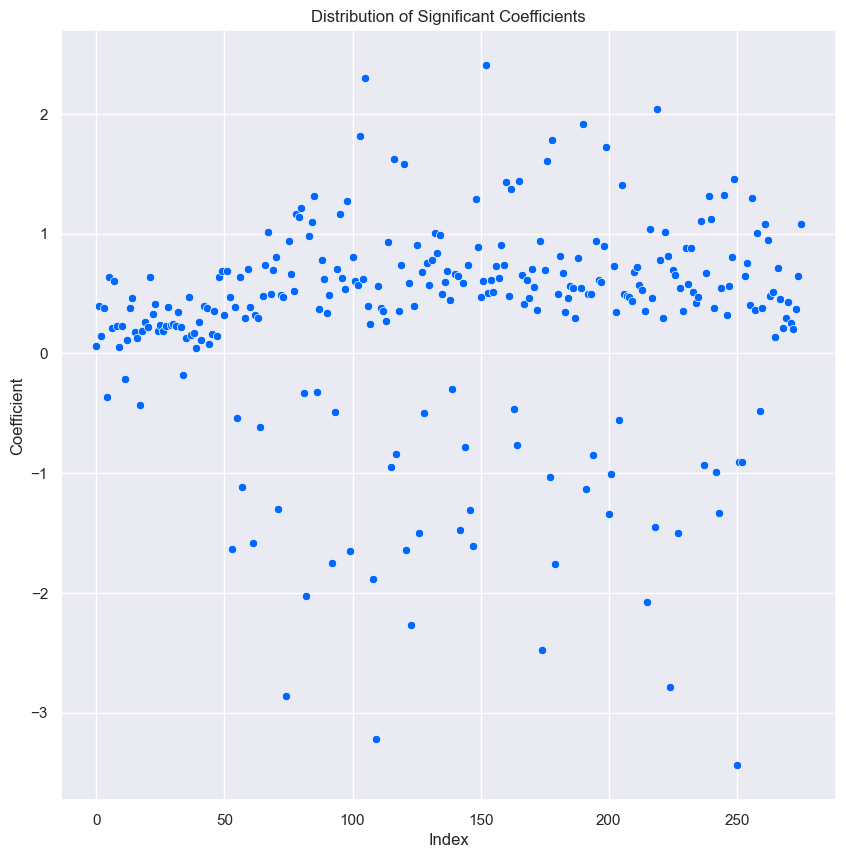

In [148]:
# Create scatterplot of only the signifcant coefficients
sns.set(rc={"figure.figsize": (10,10)})
sp_sig_coefs = sns.scatterplot(data=sig_genre_coefs+sig_studio_coefs+sig_source_coefs,color="#0068ff")
_ = sp_sig_coefs.set(ylabel = "Coefficient", xlabel="Index",title='Distribution of Significant Coefficients')

As can be seen by the two scatterplots above, most of the coefficients in the model tend to gravitate towards zero. When insignificant coefficients are removed, most of the values from the middle of the plot have disappeared. We can see that many of the values gravitate towards the positive direction while there are many more outliers in the negative side. 

These negative outliers show that whenever a genre, studio, or source negatively impacts an anime score, it impacts it more than it would to a positive score. This also shows the nature of people being more harsh on a score when they hate something compared to when they like or neutrally view something.

# Ethics & Privacy


We collected data from the website MyAnimeList, a public online source. Because this datasets is public, we have full permission to analyze them in our research. Users of this website, by creating their accounts, are made aware that their ratings and reviews will be publically available to anyone online. Furthermore, users are not compelled in any way to submit ratings or reviews, and do so only of their own choosing. 

Each and every data point used in our research respects full confidentiality of the users’ personal data. Users can create accounts anonymously, with the optional ability of revealing personal information such as birthday, gender, and location. No other personal data is collected during the account creation process. In any case, we did not consider or use any user data in our project. 

We admit that our data may be biased towards certain demographics, as we only have access to data from individuals who choose to provide ratings and reviews in online anime forums such as MyAnimeList. For example, we might expect our data to skew towards the preferences of young adult males in the United States. Unfortunately, it is difficult for us to account for or even measure this bias as such demographic data is not provided by the MyAnimeList API. As a result, our analysis probably cannot be generalized to the general anime community. We handle this issue by focusing our research question specifically on the environment of the MyAnimeList forum.

# Conclusion & Discussion

Our project analyzed attributes of anime such as source material, studio, starting season, and genre in order to determine which of them are most influential in predicting an anime's average score on MyAnimeList. These factors are typically not featured in most predictive models, which is why we decided that they would be the most interesting variables to investigate. Over the course of our analysis, we compared the distribution of scores across each attribute individually in order to get an idea of how differences in these attributes could affect scores (e.g. which studios produced anime with higher mean scores, which genres had the strongest positive or negative impact, etc.). We then created regression models, using the OLS model from the statsmodels package, for both individual attributes and across all of them collectively in order to determine whether there was a statistically significant correlation between any of these variables and score. Our results indicated that, while these attributes individually tended to have very little correlation with the score, the influence that many values within these attributes had on the mean score was statistically significant with the exception of the starting season. In addition, when combining these attributes for multiple linear regression, the resulting model had an R-squared value of 0.472, indicating that there was a much stronger degree of correlation between these attributes collectively and an anime's mean score. Digging deeper into the coefficients of the regression model indicated that the production studio of an anime tended to have the strongest impact on the model as a whole, with the largest proportion of negative coefficients that were statistically significant and the second largest average absolute value for coefficients. This finding corresponds with our hypothesis where we predicted that studios with better track records can influence the score of a new anime they produce positively, while the opposite may occur for studios with less well-received productions. In addition, our analysis found that there were more negative outlier coefficients than positive ones, indicating that negative perception of a studio, category of source materials, or genre could have more influence on an anime's score than positive perceptions of these attributes. Although the other variables that we predicted to have an impact on score, primarily genres and source material, were indeed statistically significant, they were not as influential as we initially hypothesized.

Despite our results being logically explainable, there are several limitations to our analysis. The fact that the correlation between the attributes and score is strongest when all of the attributes are combined for the multiple regression model is strong evidence of multicollinearity. This makes sense as different studios may specialize in different genres of anime or prefer adapting different types of source material; these correlations require a deeper analysis to fully understand. In addition, MyAnimeList is only one of many online anime databases and is therefore only representative of one userbase. Taking into account the same information but with different mean scores on a different website and a different userbase can help with evening out potential outliers in score (e.g. recency bias).

The results of our analysis point to an anime's studio, genre, and type of source material as the strongest factors in predicting an anime's score when collectively measured, with starting season having a relatively insignificant impact. These results can be useful in creating models attempting to predict an upcoming anime's success in terms of its critical reception, which in turn can be used for applications such as upcoming anime recommendations on streaming services. The increasing popularity of anime in recent years means that the accuracy of prediction models will be crucial for both viewers and streaming services.

# Team Contributions

* Kevin Lee
    * Wrote "Putting it all Together", helped revise and proofread, helped write Ethics & Privacy, recorded video
* Alwin Low
    * Wrote the overview, hypothesis, and performed data analysis on Studios. Helped proofread and took part in recording the video.
* Matthew Peng
    * Wrote program to query all anime data from MyAnimeList, performed data gathering and cleaning, wrote data cleaning and analysis on Start Season sections, helped record the final video.
* William Sperry
    * Wrote Genre analysis and Background, scheduled and organized group meetings and led discussions, compiled and refined and standardized group work, recorded part of the final video. 
* Michael Sun
    * Wrote Source analysis and Conclusion, recorded Conclusion for video